# Aplicacion de Algoritmos de Segmentacion a Imagenes de Melanomas Cutaneos

- Juan Manuel De La Torre. 
  
  CC. 1001.186.267  jdela@unal.edu.co
- Juliana Catalina De Castro Moreno. 
  
  CC. 1000.706.954  jdec@unal.edu.co

---

Todo el codigo fuente puede encontrarse en el siguiente repositorio:
[Github](https://github.com/JM-delatorre/TecnicasIA)

# Segmentación por similitud: División
La segmentación por similitud, específicamente mediante la técnica de división de regiones (o "splitting"), es un enfoque de procesamiento de imágenes y visión por computadora que busca particionar una imagen en subregiones más pequeñas que sean internamente homogéneas según ciertos criterios predefinidos, como la intensidad del color, la textura, o gradientes. Este método se basa en la premisa de que las regiones de una imagen que comparten atributos similares probablemente pertenezcan al mismo objeto o clase de objetos.

## Principios Básicos

La técnica de división de regiones opera bajo dos principios fundamentales:

1. **Homogeneidad:** Cada región resultante debe ser lo más homogénea posible según el criterio o los criterios definidos. La homogeneidad puede referirse a la similitud en el color, la intensidad, la textura, etc. Se utilizan métricas específicas, como la varianza de la intensidad de los píxeles, para evaluar la uniformidad de la región.

2. **División Recursiva:** La imagen se divide recursivamente en regiones más pequeñas hasta que cada subregión cumple con el criterio de homogeneidad o hasta alcanzar un tamaño mínimo de región predefinido. Este proceso de división puede visualizarse como un árbol de decisión, donde cada nodo representa una región y cada bifurcación representa una división basada en la evaluación de homogeneidad.

### Proceso de Segmentación

El proceso de segmentación por división se puede describir en los siguientes pasos:

1. **Inicio:** Comenzar con la imagen completa como una única región.

2. **Evaluación de Homogeneidad:** Evaluar si la región actual es homogénea según el criterio definido. Si una región es suficientemente homogénea o menor que el tamaño mínimo especificado, se considera una región final y no se divide más.

3. **División:** Si la región no es homogénea, se divide en subregiones más pequeñas. Este paso se realiza de manera recursiva, dividiendo cada subregión hasta que todas las subregiones resultantes sean homogéneas o hasta alcanzar un límite de tamaño mínimo.

4. **Terminación:** El proceso termina cuando todas las regiones de la imagen son homogéneas según el criterio seleccionado o cuando se alcanza el tamaño mínimo de región. El resultado es un conjunto de regiones homogéneas que, en conjunto, representan la segmentación completa de la imagen.


## Código

1. Lee una imagen en escala de grises.
2. Aplica la técnica de división de regiones basada en la varianza de la intensidad.
3. Usa una función recursiva para dividir la imagen en regiones que superen un umbral de varianza dado y que sean mayores a un tamaño mínimo especificado.
4. Asigna una etiqueta única a cada región en la máscara de segmentación resultante para distinguir las diferentes regiones.

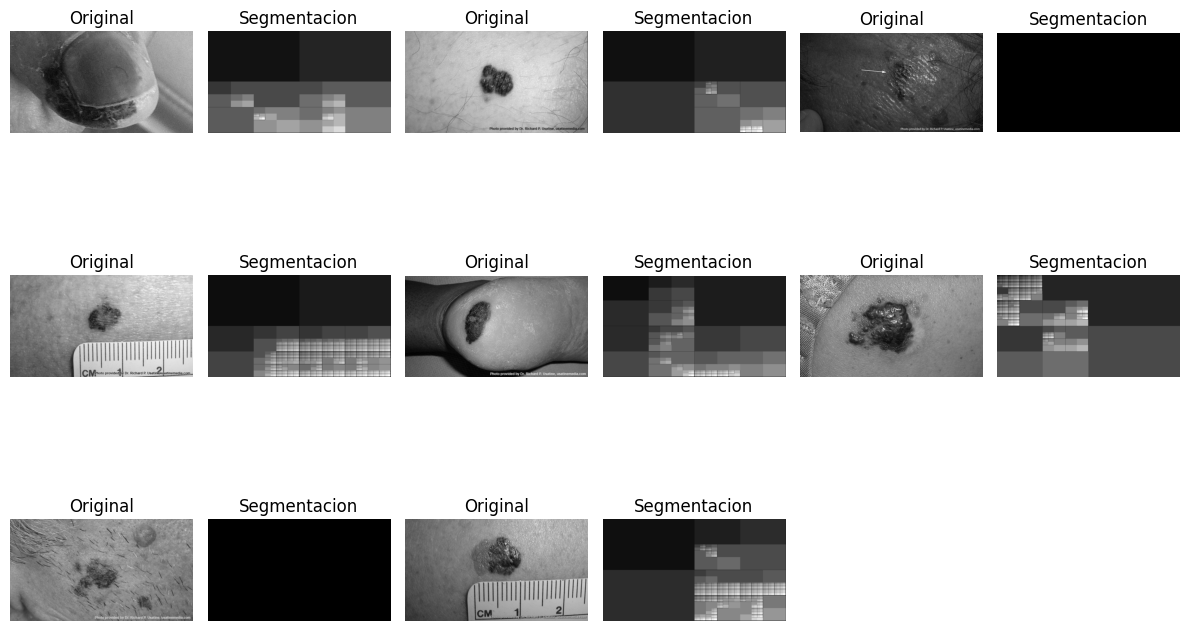

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_variance(region):
    """Calcula la varianza de una región de la imagen."""
    return np.var(region)

def split_region(image, x, y, width, height, min_size, variance_threshold, region_id, segmentation_mask):
    """
    Divide recursivamente una región de la imagen si su varianza es mayor que el umbral dado
    y el tamaño de la región es mayor que el tamaño mínimo especificado.
    """
    region = image[y:y+height, x:x+width]
    if width > min_size and height > min_size and calculate_variance(region) > variance_threshold:
        # Calcula las nuevas dimensiones
        new_width, new_height = width // 2, height // 2

        # Divide la región actual en 4 subregiones
        split_region(image, x, y, new_width, new_height, min_size, variance_threshold, region_id, segmentation_mask)
        split_region(image, x + new_width, y, new_width, new_height, min_size, variance_threshold, region_id + 1, segmentation_mask)
        split_region(image, x, y + new_height, new_width, new_height, min_size, variance_threshold, region_id + 2, segmentation_mask)
        split_region(image, x + new_width, y + new_height, new_width, new_height, min_size, variance_threshold, region_id + 3, segmentation_mask)
    else:
        # Si la región no se divide, se asigna el mismo ID de región a toda la región
        segmentation_mask[y:y+height, x:x+width] = region_id

def region_split(image, min_size, variance_threshold):
    """
    Función principal para iniciar la segmentación por división de la imagen dada.
    """
    height, width = image.shape
    segmentation_mask = np.zeros((height, width), np.int32)

    # Inicia el proceso de división desde la imagen completa
    split_region(image, 0, 0, width, height, min_size, variance_threshold, 1, segmentation_mask)

    return segmentation_mask

folder_path = "../Images"

image_files = os.listdir(folder_path)

num_images = len(image_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))

for i, filename in enumerate(image_files, 1):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Parámetros de segmentación
    min_size = 20  # Tamaño mínimo de la región
    variance_threshold = 1000  # Umbral de varianza para la división

    # Aplicar la segmentación
    segmentation_mask = region_split(image, min_size, variance_threshold)
    plt.subplot(num_rows, num_cols * 2, i * 2 - 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 2, i * 2)
    plt.imshow(segmentation_mask * 10, cmap='gray')  # Multiplicado para visualizar mejor las regiones
    plt.title("Segmentacion")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Segmentación por similitud: Mezcla de regiones

La segmentación por similitud, en particular mediante la técnica de mezcla de regiones (también conocida como fusión de regiones), es un enfoque de procesamiento de imágenes y visión por computadora que tiene como objetivo dividir una imagen en segmentos o regiones que son similares según ciertos criterios como el color, la textura, la intensidad y otros atributos relevantes.

Este método se basa en el principio de que los píxeles dentro de una misma región comparten características similares, y por lo tanto, pueden agruparse para facilitar el análisis y la interpretación de la imagen.

## Componentes clave de la Segmentación por Similitud

1. **Preprocesamiento:** Mejora la calidad de la imagen para la segmentación, aplicando técnicas como el suavizado para reducir el ruido y la mejora del contraste para destacar las características importantes.

2. **Segmentación Inicial:** Se realiza una primera segmentación para dividir la imagen en regiones basadas en algún criterio inicial simple, como un umbral de color o intensidad. Métodos comunes incluyen la segmentación de aguas divisorias, k-means y Canny edge detection.

3. **Cálculo de Características:** Para cada región identificada en la segmentación inicial, se calculan características representativas. Estas pueden incluir:

4. **Color:** El color promedio o la distribución de colores dentro de la región.

5. **Textura:** Características de la textura como contraste, homogeneidad, y energía, que pueden calcularse usando matrices de co-ocurrencia de niveles de gris.

6. **Forma:** Aspectos como el perímetro, el área, la excentricidad, y otros descriptores de forma.
Ubicación y tamaño: La posición de la región dentro de la imagen y su tamaño.

7. **Criterios de Fusión:** Define cómo se determina la similitud entre regiones para decidir si deben fusionarse. Los criterios pueden ser:

8. **Umbral de Diferencia:** Fusionar regiones si la diferencia en sus características es menor a un umbral predefinido.

9. **Análisis Clúster:**  Utilizar técnicas de agrupamiento para fusionar regiones basadas en la proximidad de sus características en el espacio de características.
Fusión de Regiones: Basándose en los criterios de fusión, las regiones iniciales se combinan iterativamente para formar regiones más grandes que cumplan con los criterios de similitud establecidos. Este proceso continúa hasta que no se puedan fusionar más regiones sin violar los criterios de similitud.

10. **Postprocesamiento:** Refinamiento final de la segmentación, que puede incluir suavizado de bordes y eliminación de regiones pequeñas o atípicas para mejorar la coherencia y la apariencia visual de los segmentos.

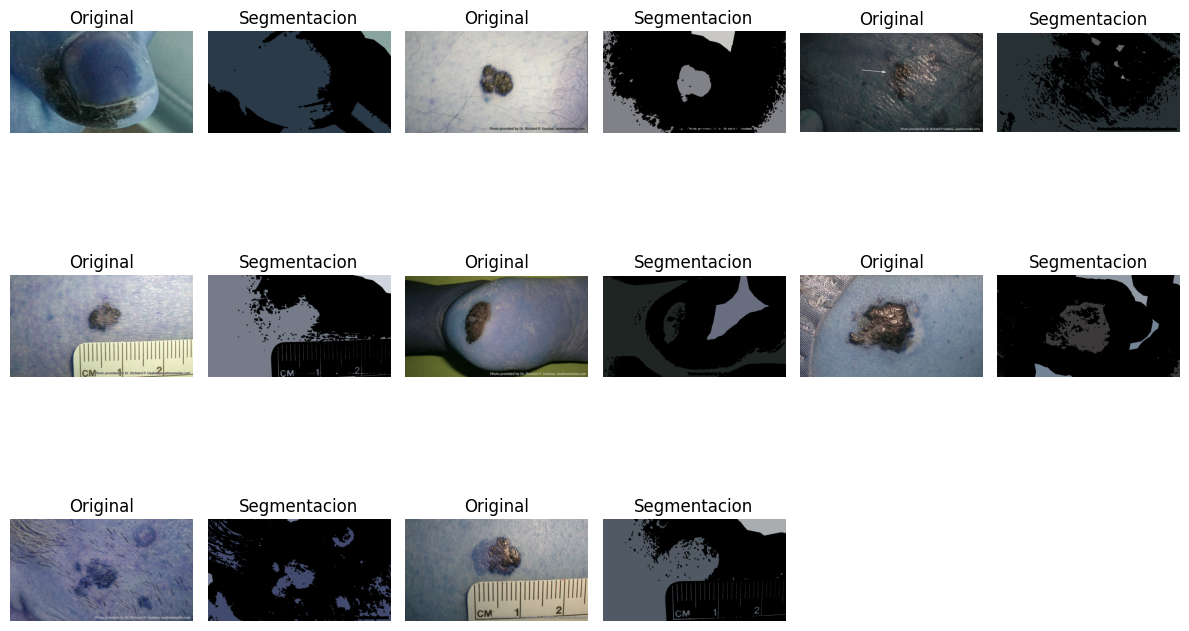

In [19]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
import os

def calculate_texture_features(region, distances=[5], angles=[0], levels=256):
    """
    Calcula características de textura usando la matriz de co-ocurrencia de niveles de gris.
    """
    glcm = graycomatrix(region, distances=distances, angles=angles, levels=levels)
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    return np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation])

def preprocess_image(image):
    """
    Aplica preprocesamiento a la imagen para mejorar la segmentación.
    """
    # Aplicar suavizado para reducir el ruido
    blurred = cv2.GaussianBlur(image, (7, 7), 0)
    return blurred

def initial_segmentation(image):
    """
    Realiza una segmentación inicial de la imagen.
    """
    # Convertir a escala de grises y binarizar
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Aplicar la transformación de distancia y la segmentación de aguas divisorias
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(cv2.dilate(thresh, np.ones((3,3),np.uint8), iterations=3), sure_fg)

    # Marcadores para aguas divisorias
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    return markers

def merge_regions(image, markers, color_threshold=30, texture_threshold=0.5):
    """
    Mezcla regiones basadas en color y textura.
    """
    labels = np.unique(markers)
    label_info = []

    for label in labels:
        if label == 0:  # Fondo
            continue

        mask = markers == label
        region = image[mask]

        # Calcula color promedio y características de textura
        color = np.mean(region, axis=0)
        texture = calculate_texture_features(cv2.cvtColor(region.reshape(-1, 1, 3), cv2.COLOR_BGR2GRAY))

        label_info.append((label, color, texture))

    # Clustering basado en color y textura
    features = np.array([np.concatenate([color, texture]) for _, color, texture in label_info])
    kmeans = KMeans(n_clusters=min(5, len(features))).fit(features)

    # Reconstruir imagen
    result = np.zeros_like(image)
    for idx, (label, _, _) in enumerate(label_info):
        cluster_label = kmeans.labels_[idx]
        mask = markers == label
        result[mask] = kmeans.cluster_centers_[cluster_label][:3]  # Usar solo parte de color

    return result

def segment_by_similarity(image):
    """
    Función principal para segmentar la imagen por similitud.
    """
    preprocessed = preprocess_image(image)
    markers = initial_segmentation(preprocessed)
    result = merge_regions(image, markers)
    return result



folder_path = "../Images"

image_files = os.listdir(folder_path)

num_images = len(image_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))

for i, filename in enumerate(image_files, 1):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    result = segment_by_similarity(image)

    plt.subplot(num_rows, num_cols * 2, i * 2 - 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 2, i * 2)
    plt.imshow(result, cmap='gray') 
    plt.title("Segmentacion")
    plt.axis('off')

plt.tight_layout()
plt.show()

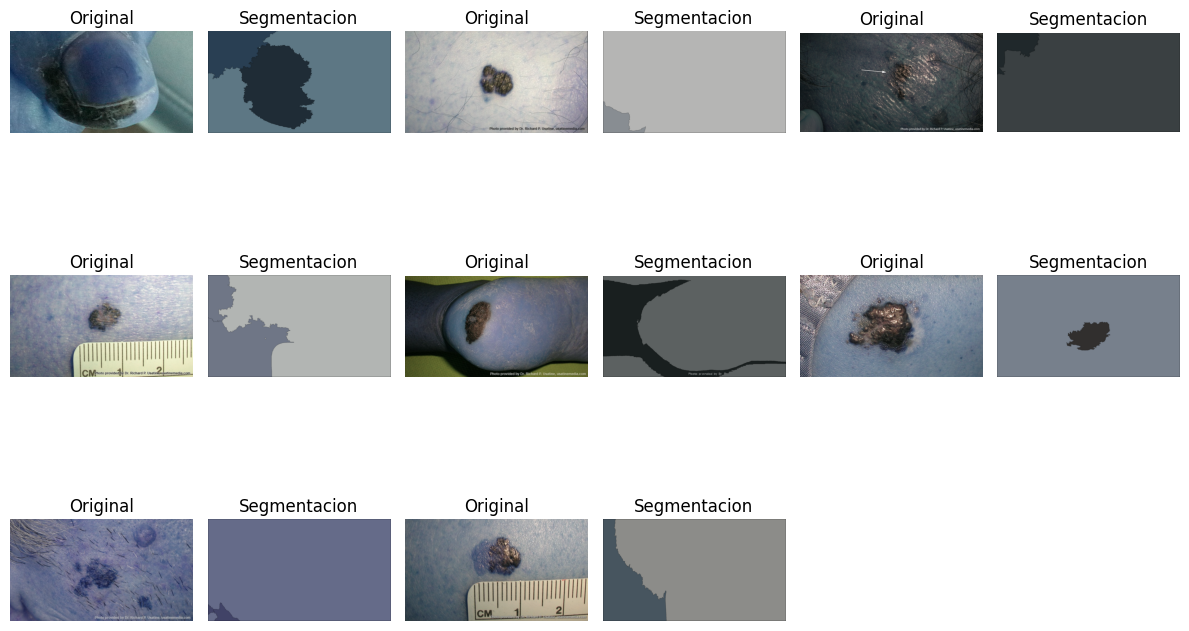

In [23]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage import img_as_ubyte
from sklearn.metrics import pairwise_distances

def preprocess_image(image):
    """
    Aplica un filtro gaussiano para suavizar la imagen.
    """
    return cv2.GaussianBlur(image, (5, 5), 0)

def initial_segmentation(image):
    """
    Utiliza la segmentación de aguas divisorias para obtener regiones iniciales.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Eliminación de ruido y determinación de fondo
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Detección de áreas seguras de primer plano
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

    # Identificación de áreas desconocidas
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Etiquetado de marcadores
    ret, markers = cv2.connectedComponents(sure_fg)

    # Añadir uno a todos los marcadores para asegurar que el fondo sea 1, no 0
    markers = markers + 1

    # Marcado del área desconocida con cero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Marcando bordes con rojo

    return markers

def calculate_region_features(image, markers):
    """
    Calcula el color promedio y las características de textura para cada región.
    """
    regions = np.unique(markers)
    features = []
    for region in regions:
        if region == -1:  # Ignorar bordes
            continue
        mask = markers == region
        region_pixels = image[mask]

        # Color promedio
        color_feature = np.mean(region_pixels, axis=0)

        # Textura
        gray_region = cv2.cvtColor(region_pixels.reshape(-1, 1, 3), cv2.COLOR_BGR2GRAY)
        glcm = graycomatrix(img_as_ubyte(gray_region), [1], [0], 256, symmetric=True, normed=True)
        texture_feature = graycoprops(glcm, 'contrast')[0, 0]

        features.append((region, color_feature, texture_feature))

    return features

def merge_regions(image, markers, features, color_threshold=30, texture_threshold=5):
    """
    Fusiona regiones basadas en la similitud de sus características de color y textura.
    """
    # Calcular distancias entre características
    for i, (region_i, color_i, texture_i) in enumerate(features):
        for j, (region_j, color_j, texture_j) in enumerate(features):
            if i >= j:
                continue
            color_distance = np.linalg.norm(color_i - color_j)
            texture_distance = abs(texture_i - texture_j)

            if color_distance < color_threshold and texture_distance < texture_threshold:
                # Fusionar regiones
                markers[markers == region_j] = region_i

    # Recalcular características después de la fusión
    new_features = calculate_region_features(image, markers)
    return markers, new_features

def visualize_segmentation(image, markers):
    """
    Visualiza la segmentación coloreando cada región con su color promedio.
    """
    segmented_image = np.zeros_like(image)
    for region, color, _ in features:
        segmented_image[markers == region] = color
    return segmented_image

folder_path = "../Images"

image_files = os.listdir(folder_path)

num_images = len(image_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))

for i, filename in enumerate(image_files, 1):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    # Preprocesamiento
    preprocessed_image = preprocess_image(image)

    # Segmentación inicial
    markers = initial_segmentation(preprocessed_image)

    # Cálculo de características
    features = calculate_region_features(image, markers)

    # Fusión de regiones basada en similitud de características
    markers, features = merge_regions(image, markers, features)

    # Visualización
    segmented_image = visualize_segmentation(image, markers)

    plt.subplot(num_rows, num_cols * 2, i * 2 - 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 2, i * 2)
    plt.imshow(segmented_image) 
    plt.title("Segmentacion")
    plt.axis('off')

plt.tight_layout()
plt.show()

